In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('dataset (1).csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

In [23]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [24]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [35]:
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std


In [36]:
n = len(X)

In [37]:
n

237

In [42]:
def predict(X, w, b):
    return w * X + b

lpha = 0.001 
iterations = 1000

w = 0
b = 0

for i in range(iterations):
    y_pred = predict(X, w, b)
    dw = -(2/n) * np.sum(X * (Y - y_pred))
    db = -(2/n) * np.sum(Y - y_pred)
    
    if np.isnan(dw) or np.isnan(db):
        print(f"NaN detected at iteration {i}")
        break
    
    w -= alpha * dw
    b -= alpha * db
    
    if i % 100 == 0:
        mse = np.mean((Y - y_pred) ** 2)
        print(f"Iteration {i}: MSE = {mse}")

print(f"Final weights: w = {w}, b = {b}")

x_max = np.max(X) + 100
x_min = np.min(X) - 100

x = np.linspace(x_min, x_max, 1000)
y = b + w * x

Iteration 0: MSE = 1660184.9240506329
Iteration 100: MSE = 34309.14616326845
Iteration 200: MSE = 5713.329794249428
Iteration 300: MSE = 5210.3881028041105
Iteration 400: MSE = 5201.5423911891785
Iteration 500: MSE = 5201.386813285605
Iteration 600: MSE = 5201.384076989743
Iteration 700: MSE = 5201.3840288639185
Iteration 800: MSE = 5201.384028017483
Iteration 900: MSE = 5201.384028002595
Final weights: w = 96.01736350841944, b = 1282.8734155624848


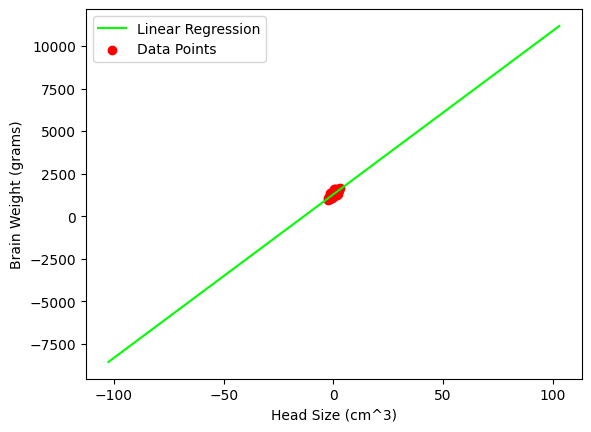

In [43]:
plt.plot(x, y, color='#00ff00', label='Linear Regression')
plt.scatter(X, Y, color='#ff0000', label='Data Points')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

# RMSE

In [44]:
rmse = 0
for i in range(n):
    y_pred = b + w * X[i]
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)
print("RMSE:", rmse)

RMSE: 72.12062137837094


# R square

In [45]:
y_mean = np.mean(Y)
sumofsquares = 0
sumofresiduals = 0
for i in range(n):
    y_pred = b + w * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2

score = 1 - (sumofresiduals / sumofsquares)
print("R-squared:", score)

R-squared: 0.639311719957
